




### INSURANCE CLAIM PROJECT

### Background:
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, the attributes of customers can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.
As a Data Scientist in the Plateau Insurance company. The company wants to have a detailed understanding of the customer base for one of its Insurance Policy 'MediClaim'. The idea is to generate insights about the customers and answer a few key questions, by using the past dataset. The dataset 'pla_Insurance' contains customers' details like age, sex, charges, etc.

### Objective:
To explore the dataset and extract insights from the data. 
>  Explore the dataset and extract insights using Exploratory Data Analysis.
- Prove(or disprove) that the medical claims made by the people who smoke are greater than those who don't?
- Prove (or disprove) with that the BMI of females is different from that of males.
- Does the smoking habit of customers depend on their region?
- Is the mean BMI of women with no children, one child, and two children the same? 



#### Data Dictionary –
- Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex - This is the policy holder's gender, either male or female.
- BMI - This is the body mass index (BMI), which provides a sense of how over or underweight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children - This is an integer indicating the number of children/dependents covered by the insurance plan.
- Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
- Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges - Individual medical costs billed to health insurance


### importing necesary libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
# data importing and reading in of Data sets
insurance = pd.read_csv('plateau_insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,52,female,46.750,5,no,southeast,12592.53450
1335,54,female,47.410,0,yes,southeast,63770.42801
1336,37,female,47.600,2,yes,southwest,46113.51100


In [3]:
#assess the dataset's description
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.682687,1.094918,13270.422265
std,14.049960,6.145674,1.205493,12110.011237
min,18.000000,14.000000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
insurance.head(30)

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,26,female,15.500,2,yes,northeast,14455.64405
6,37,female,16.500,2,no,northeast,6877.98010
7,28,female,17.290,0,no,northeast,3732.62510
8,37,male,29.830,2,no,northeast,6406.41070
9,21,female,17.400,1,no,southwest,2585.26900


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#assess the dataset for data duplicates
insurance.duplicated().sum()

1

In [49]:
insurance.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.800  2         no      southwest  4934.70500     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

In [50]:
#assess the dataset for missing data
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### EXPLORATTORY DATA ANALYSIS

### Univariate Analysis

In [51]:
#importing visualization libraries
import seaborn as sns
%matplotlib inline
import matplotlib as plt

In [52]:
#univariate analysis for the body mass index feature
insurance['bmi'].describe()

count    1338.000000
mean       30.682687
std         6.145674
min        14.000000
25%        26.315000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

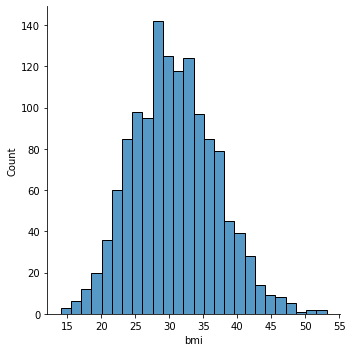

In [53]:
sns.displot(insurance['bmi'])

In [54]:
insurance['bmi'].value_counts()

32.30    13
28.31     9
30.80     8
34.10     8
28.88     8
         ..
24.40     1
31.80     1
35.09     1
22.22     1
48.07     1
Name: bmi, Length: 552, dtype: int64

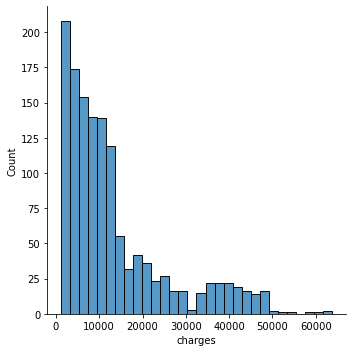

In [55]:
#univariate analysis for the charges feature
insurance['charges'].value_counts()
sns.displot(insurance['charges'])

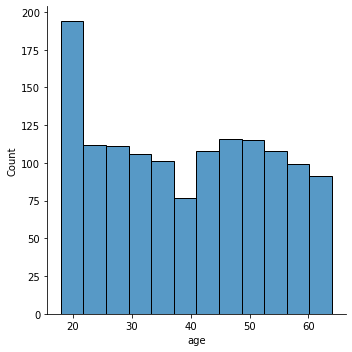

In [56]:
#univariate analysis for the age feature
insurance['age'].value_counts()
sns.displot(insurance['age'])

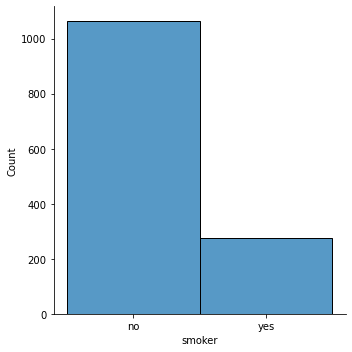

In [57]:
#univariate analysis of the smoker feature
insurance['smoker'].value_counts()
sns.displot(insurance['smoker'])


#### Observations
- Majority of the people a BMI of about 25 to 35, over 140 have a BMI of 28 which is the highest.
- Majority of the people claim  a charge of about 1000 to 15000.
- Majority of the claimers those in the age group of late teens to early twenties.
- Majority of claimers are not smokers, over a 1000 dont smoke while 250(more or less) smoke.
- Majority of the claimers a males(676), with the females(662).



In [58]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

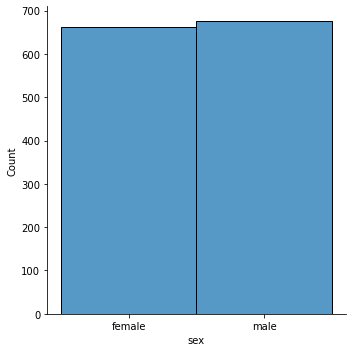

In [59]:
#graphical visualiation of the sex feature
sns.displot(insurance['sex'])


In [60]:
#graphical visualiation of the target label(charges feature)


### Bivariate Analysis

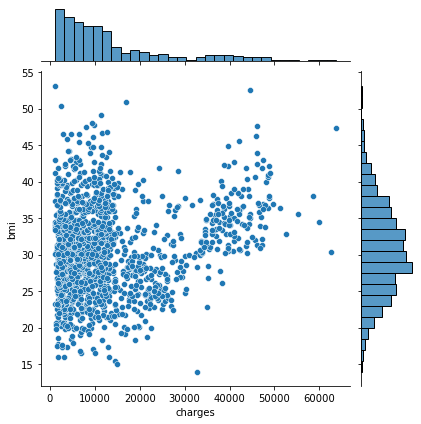

In [61]:
#jointplot exploring the relationship between the bmi vs charges features
sns.jointplot(x='charges',y='bmi',data=insurance)

<AxesSubplot:xlabel='sex', ylabel='bmi'>

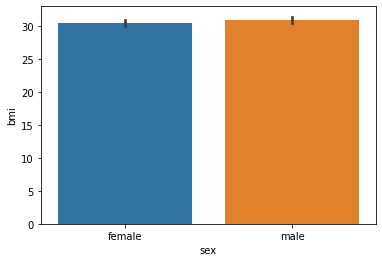

In [62]:
#exploring the distributions and the relationships between the bmi vs the sex/gender feature
sns.barplot(x='sex',y='bmi',data=insurance)

In [63]:
#bivariate analysis of the region vs smoker features
df=insurance.groupby(['region', 'smoker']).size()
df

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
dtype: int64

In [64]:
crosstab_table = pd.crosstab(insurance['region'],insurance['smoker'])
crosstab_table

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<AxesSubplot:xlabel='region,smoker'>

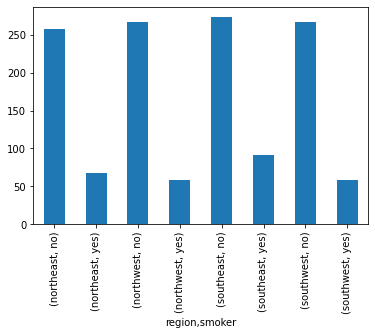

In [65]:
df.plot.bar()

In [66]:
#exploring the relationship between the sex vs smoker vs charges features
gh=insurance.groupby(['sex', 'smoker']).size()
gh

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
dtype: int64

<AxesSubplot:xlabel='sex,smoker'>

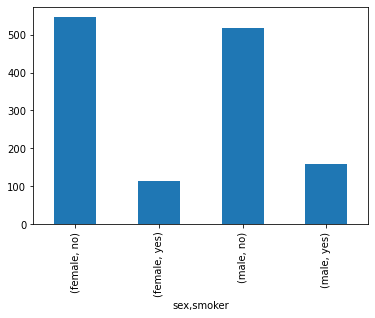

In [67]:
gh.plot.bar()

<AxesSubplot:xlabel='smoker', ylabel='children'>

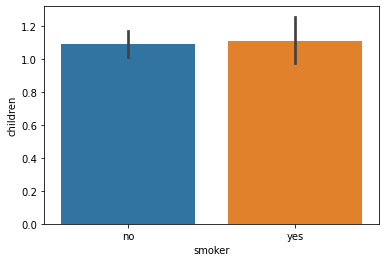

In [68]:
#exploring the relationship between the number of children feature and the smoker feature 
sns.barplot(x='smoker',y='children',data=insurance)

<AxesSubplot:xlabel='children', ylabel='charges'>

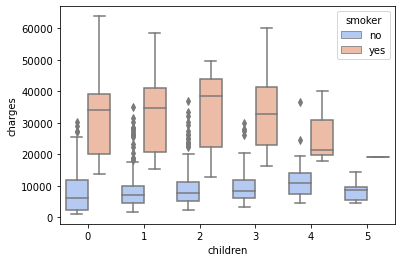

In [69]:
#bivariate analysis of the number of children feature Vs the medical claim charges feature Vs the smoker feature
sns.boxplot(x="children", y="charges", hue="smoker",data=insurance, palette="coolwarm")

<AxesSubplot:xlabel='smoker', ylabel='charges'>

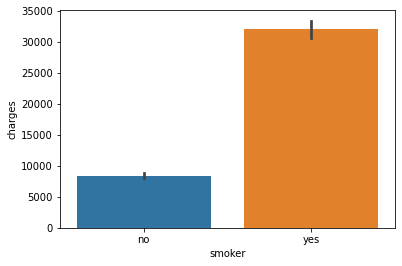

In [70]:
#exploring the relationship between the charges vs smoker vs charges features
sns.barplot(x='smoker',y='charges',data=insurance)

#### Observation
- The people with less BMI have more claims and vice verse with those people with more BMI have less claims.
- The BMI of males is slightly higher than that of females.
- People in the south east region smoke more than any other region.
- The number of male smokers is more than that of female smokers with the value ratio of 159:115.
- Slightly more people with children smoke and most of them have one child.
- People with children who smoke have mor claim.


### Multivariate Analaysis

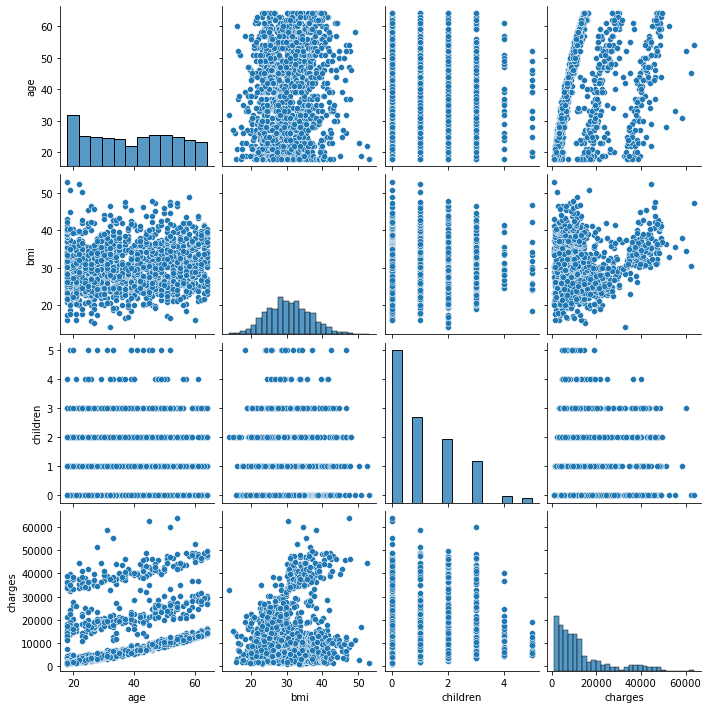

In [71]:
#use a pairplot to explore the relationship between the nummerical features in the dataset
sns.pairplot(insurance)

In [72]:
## heatmeap to see the correlation between features. 
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.105845,0.042469,0.299008
bmi,0.105845,1.000000,0.007866,0.197842
children,0.042469,0.007866,1.000000,0.067998
charges,0.299008,0.197842,0.067998,1.000000


<AxesSubplot:>

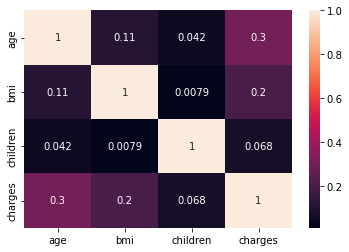

In [73]:
sns.heatmap(insurance.corr(),annot = True)

**Observations**
- Most of the variables have low correlation with each other as the variables with the highest correlation in this dataset are   charges and children with 0.3 weak(positive weak) and majority of the variables have less than 0.2(very weak positive)
